In [1]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/drive', force_remount=True)

unset HISTFILE; export PS1="root@375461ff2490-7a517d1280f64d9cb4d65e7284a9f992: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@375461ff2490-7a517d1280f64d9cb4d65e7284a9f992: umount -f /content/drive || umount /content/drive; pkill -9 -x drive
root@375461ff2490-7a517d1280f64d9cb4d65e7284a9f992: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@375461ff2490-7a517d1280f64d9cb4d65e7284a9f992: ( while `sleep 0.5`; do if [[ -d "/content/drive" && "$(ls -A /content/drive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 1196
root@375461ff2490-7a517d1280f64d9cb4d65e7284a9f992: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_omit_spaces:true --inet_family=IPV4_ONLY --metadata_server_auth_uri=172.28.0.1:8009/computeMetadata

In [8]:
import nltk
import re
nltk.download('punkt')
import os
from nltk import sent_tokenize
import pandas as pd


def filtering(df):
  positive_news_cnt = 0
  negative_news_cnt = 0
  neutral_news_cnt = 0
  for corpus in df['content']:
    corpus = corpus.split("다.")
    sentence = []
    for i in keyword_head: ## 해당 기사의 문장 중 첫번째 단어군 중 하나라도 포함하는지
      for j in corpus: 
        if i in j:
          sentence.append(j) 
    sentence_2 = []
    result_positive = []
    for i in keyword_center: ## 추출된 문장들이 두번째 단어군 중 하나라도 포함하는지
      for j in sentence:
        if (i in j) and (i not in sentence_2):
          sentence_2.append(j)

          

    for i in sentence_2:   ## 또 추출된 문장에서 부정적단어는 없으면서 긍정적 단어가 존재하는지
      for n in negative_word:
        if n in i:
          break
      else:
        for p in positive_word:
          if (p in i) and (i not in result_positive) :
            result_positive.append(i)
    
    
    result_negative = []   ## 추출된 문장에서 긍정적단어는 없으면서 부정적 단어가 존재하는지
    for i in sentence_2:
      for p in positive_word:
        if p in i:
          break
      else:
        for n in negative_word:
          if (n in i) and (i not in result_negative):
            result_negative.append(i)
 
    if result_positive : ## 기사에 긍정적 문장이 하나라도 있다면 긍정뉴스로 +1
      positive_news_cnt +=1
    if result_negative : ## 기사에 부정적 문장이 하나라도 있다면 부정뉴스로 +1
      negative_news_cnt +=1
    if sentence_2:
      neutral_news_cnt += 1


  ans = positive_news_cnt/(neutral_news_cnt) 
  return print(f'{year} {month}월 총 기사수 :{len(df)} / 긍정적 기사 수 : {positive_news_cnt} / 부정적 기사 수 : {negative_news_cnt} / 중립기사 수: {neutral_news_cnt} / 뉴스 심리비율 : {round(ans,3)}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
path_dir = './drive/MyDrive/krx/섹터_물류/2019' 
file_list = os.listdir(path_dir)
file_list = sorted(file_list)

keyword_head = ['물류','물류센터','저온창고','상온창고']
keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']

year = 2019
month = 1
for file in file_list:
  data = pd.read_csv(path_dir + '/'  + file)
  data.dropna(axis =0,inplace=True)
  mask = data['title'].str.contains('인사')
  data = data[~mask]
  filtering(data)
  month +=1 

2019 1월 총 기사수 :182 / 긍정적 기사 수 : 16 / 부정적 기사 수 : 1 / 중립기사 수: 72 / 뉴스 심리비율 : 0.222
2019 2월 총 기사수 :148 / 긍정적 기사 수 : 18 / 부정적 기사 수 : 1 / 중립기사 수: 60 / 뉴스 심리비율 : 0.3
2019 3월 총 기사수 :248 / 긍정적 기사 수 : 24 / 부정적 기사 수 : 1 / 중립기사 수: 84 / 뉴스 심리비율 : 0.286
2019 4월 총 기사수 :178 / 긍정적 기사 수 : 11 / 부정적 기사 수 : 2 / 중립기사 수: 66 / 뉴스 심리비율 : 0.167
2019 5월 총 기사수 :189 / 긍정적 기사 수 : 28 / 부정적 기사 수 : 5 / 중립기사 수: 83 / 뉴스 심리비율 : 0.337
2019 6월 총 기사수 :169 / 긍정적 기사 수 : 19 / 부정적 기사 수 : 4 / 중립기사 수: 81 / 뉴스 심리비율 : 0.235
2019 7월 총 기사수 :203 / 긍정적 기사 수 : 22 / 부정적 기사 수 : 0 / 중립기사 수: 87 / 뉴스 심리비율 : 0.253
2019 8월 총 기사수 :127 / 긍정적 기사 수 : 14 / 부정적 기사 수 : 2 / 중립기사 수: 66 / 뉴스 심리비율 : 0.212
2019 9월 총 기사수 :113 / 긍정적 기사 수 : 15 / 부정적 기사 수 : 0 / 중립기사 수: 42 / 뉴스 심리비율 : 0.357
2019 10월 총 기사수 :155 / 긍정적 기사 수 : 24 / 부정적 기사 수 : 5 / 중립기사 수: 73 / 뉴스 심리비율 : 0.329
2019 11월 총 기사수 :201 / 긍정적 기사 수 : 23 / 부정적 기사 수 : 5 / 중립기사 수: 85 / 뉴스 심리비율 : 0.271
2019 12월 총 기사수 :196 / 긍정적 기사 수 : 29 / 부정적 기사 수 : 3 / 중립기사 수: 86 / 뉴스 심리비율 : 0.337


In [10]:
import os
import pandas as pd
path_dir = './drive/MyDrive/krx/섹터_주택/2019' 
file_list = os.listdir(path_dir)
file_list = sorted(file_list)

keyword_head = ['주택','아파트','주거','오피스텔']
keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']

year = 2019
month = 1
for file in file_list:
  df = pd.read_csv(path_dir + '/'  + file)
  df.dropna(axis =0,inplace=True)
  mask = df['title'].str.contains('인사')
  df = df[~mask]
  filtering(df)
  month +=1 

2019 1월 총 기사수 :1826 / 긍정적 기사 수 : 397 / 부정적 기사 수 : 317 / 중립기사 수: 1069 / 뉴스 심리비율 : 0.371
2019 2월 총 기사수 :1876 / 긍정적 기사 수 : 387 / 부정적 기사 수 : 417 / 중립기사 수: 1241 / 뉴스 심리비율 : 0.312
2019 3월 총 기사수 :1663 / 긍정적 기사 수 : 328 / 부정적 기사 수 : 281 / 중립기사 수: 1096 / 뉴스 심리비율 : 0.299
2019 4월 총 기사수 :1226 / 긍정적 기사 수 : 281 / 부정적 기사 수 : 269 / 중립기사 수: 812 / 뉴스 심리비율 : 0.346
2019 5월 총 기사수 :1768 / 긍정적 기사 수 : 359 / 부정적 기사 수 : 279 / 중립기사 수: 1059 / 뉴스 심리비율 : 0.339
2019 6월 총 기사수 :1329 / 긍정적 기사 수 : 354 / 부정적 기사 수 : 196 / 중립기사 수: 928 / 뉴스 심리비율 : 0.381
2019 7월 총 기사수 :1744 / 긍정적 기사 수 : 446 / 부정적 기사 수 : 243 / 중립기사 수: 1096 / 뉴스 심리비율 : 0.407
2019 8월 총 기사수 :1755 / 긍정적 기사 수 : 459 / 부정적 기사 수 : 230 / 중립기사 수: 1158 / 뉴스 심리비율 : 0.396
2019 9월 총 기사수 :1215 / 긍정적 기사 수 : 395 / 부정적 기사 수 : 153 / 중립기사 수: 877 / 뉴스 심리비율 : 0.45
2019 10월 총 기사수 :1606 / 긍정적 기사 수 : 513 / 부정적 기사 수 : 196 / 중립기사 수: 1129 / 뉴스 심리비율 : 0.454
2019 11월 총 기사수 :1243 / 긍정적 기사 수 : 432 / 부정적 기사 수 : 151 / 중립기사 수: 917 / 뉴스 심리비율 : 0.471
2019 12월 총 기사수 :1923 / 긍정적 기사 수 : 554 / 부정적 기사

In [ ]:


keyword_head = ['주택','아파트','주거','오피스텔']
keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']



df = pd.read_csv('./drive/MyDrive/krx/섹터_주택/2019/news_주택 부동산from_20190201to_20190231.csv')
mask = df['title'].str.contains('인사')
df = df[~mask]
df.dropna(axis=0,inplace=True)
positive_news_cnt = 0
negative_news_cnt = 0
for corpus in df['content']:
  corpus = corpus.replace('“','')
  corpus = corpus.replace('"','')
  corpus = corpus.split("다.")
  sentence = []
  for i in corpus:
    for j in keyword_head:
      if (j in i) and  ( i not in sentence):
        sentence.append(i)
  sentence_2 = []

  for i in sentence:
    for j in keyword_center:
      if (j in i) and (i not in sentence_2):
        sentence_2.append(i)
  result_positive = []
  for i in sentence_2:
    for n in negative_word:
      if n in i:
        break
    else:
      for p in positive_word:
        if (p in i) and (i not in result_positive) :
          result_positive.append(i)
  
  
  result_negative = []
  for i in sentence_2:
    for p in positive_word:
      if p in i:
        break
    else:
      for n in negative_word:
        if (n in i) and (i not in result_negative):
          result_negative.append(i)




  if result_positive :
    positive_news_cnt +=1
    print(f'p{result_positive}')

  if result_negative :
    negative_news_cnt +=1
    print(f'n{result_negative}')

print(positive_news_cnt)
print(negative_news_cnt)


### 긍정부정 단어가 둘다 있어도 중립, 없어도 중립, 긍정단어만 있으면 긍정문장, 부정단어만 있으면 부정문장 


n["최근 전세가격이 급락해 전세보증금을 끼고 주택을 매매하는 소위 '갭투자'에 비상이 걸리자 '피터팬의 좋은방 구하기'가 전·월세 거래에 대해 최고 10억원까지 보증보험을 통해 보장해주는 서비스를 출시한 것도 영향을 미쳤"]
n['황율남 한화건설 주택사업2팀장은 최근 부동산시장 침체가 계속되면서 주택 구매를 망설이는 실수요자들이 공공지원 민간임대주택에 많은 관심을 갖고 있다면서 인천 남동구청과 협의해 자녀를 안심하고 맡길 수 있는 단지 내 국공립 어린이집 유치를 추진 중이다라고 말했']
n["[\n인허가, 수도권 10%↓·지방 20%↓착공·분양·준공도 함께 '뒷걸음질'\n\n\n\n단위=만채, 자료=국토교통부[이데일리 경계영 기자] 부동산 경기가 얼어붙으면서 지난달 주택 인허가와 착공, 분양 건수가 감소세를 나타냈"]
n['27일 국토교통부에 따르면 향후 2∼3년 주택 경기를 내다볼 수 있는 주택 인허가 물량은 1월 기준으로 전국 3만2023호로 작년 동월(3만7696호) 대비 15.0% 감소했']
p[' 해당 공인중개사사무소 관계자에 따르면 곡반정동은 공실률이 낮고 편의시설이 계속 확대돼 생활 환경이 우수하다라며 해당 구역은 저평가돼있어 아파트 전세금만으로도 다가구주택을 소유할 수 있는 매력적인 투자처']
p['[\n\t\t\t작년 12월 주택착공 11.2%↓…주택값 상승폭, 3년4개월래 최소(뉴욕=연합뉴스) 이준서 특파원 = 미국 주택경기의 부진이 심화하고 있']
p[' 꼬마빌딩 소유주 중 83.3%는 꼬마빌딩을 가장 유망한 수익형 부동산으로 꼽은 반면 오피스텔 임대, 주택임대, 지식산업센터는 피해야 할 수익형 부동산으로 분류했']
n['부동산114 등 주택 업계에 따르면, 2월 둘째 주 서울 아파트 매매가격은 0.04% 내려 13주 연속 하락세를 나타내고 있', '부동산 전문가들은 최근 서울 주택시장이 하락세를 띠고 있다는 점에서 요즘 알짜 입지로 떠오르는 강북 등에 대한 관심은 더욱 뜨거워질 것으로 보인다”며 특히 서울 대다수의 새 아파트가 재개발·재

In [3]:
import pandas as pd
date_index = pd.date_range("2019-1-1", "2022-5-31",freq = "M")
date_index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31'],
              dtype='datetime64[ns]', freq='M')

#섹터별 뉴스 심리 지수 데이터프레임 만들기

## 주택 뉴스 심리지수

In [6]:
import os
import pandas as pd
path_dir = './drive/MyDrive/krx/Data/섹터_주택' 
file_list = os.listdir(path_dir)
file_list = sorted(file_list)

keyword_head = ['주택','아파트','주거','오피스텔','부동산','상업용']
keyword_center = ['수요','투자','선호','경기','거래','가치','매매','임대료','수익','이익','수익률','건설','건축','착공','시공','가격','매매가','전세가','분양가','전망','예측']
positive_word = ['강세','강화','유망','호재','증가','확대','급등','개선','상승','인기','활황','집중','반등']
negative_word = ['약세','실망','하락','급락','감소','축소','위험','최저','위축','충격','약화','둔화','침체']

year = ['2019','2020','2021','2022']
주택뉴스심리지수 = []
for y in year:
  path_dir = './drive/MyDrive/krx/Data/섹터_주택/' + y
  file_list = sorted(os.listdir(path_dir))
  for file in file_list:
    df = pd.read_csv(path_dir + '/'  + file)
    df.dropna(axis =0,inplace=True)
    mask = df['title'].str.contains('인사')
    df = df[~mask]
    value = filtering(df)
    주택뉴스심리지수.append(value)
print(len(주택뉴스심리지수))

41


## 물류뉴스심리지수

In [7]:
keyword_head = ['물류','물류센터','저온창고','상온창고','부동산','상업용']

year = ['2019','2020','2021','2022']
물류뉴스심리지수 = []
for y in year:
  path_dir = './drive/MyDrive/krx/Data/섹터_물류/' + y
  file_list = sorted(os.listdir(path_dir))
  for file in file_list:
    df = pd.read_csv(path_dir + '/'  + file)
    df.dropna(axis =0,inplace=True)
    mask = df['title'].str.contains('인사')
    df = df[~mask]
    value = filtering(df)
    물류뉴스심리지수.append(value)
print(len(물류뉴스심리지수))

41


## 오피스뉴스심리지수

In [8]:
keyword_head = ['오피스','빌딩','상업용 빌딩','업무용 빌딩','부동산','상업용']
year = ['2019','2020','2021','2022']
오피스뉴스심리지수 = []
for y in year:
  path_dir = './drive/MyDrive/krx/Data/섹터_오피스/' + y
  file_list = sorted(os.listdir(path_dir))
  for file in file_list:
    df = pd.read_csv(path_dir + '/'  + file)
    df.dropna(axis =0,inplace=True)
    mask = df['title'].str.contains('인사')
    df = df[~mask]
    value = filtering(df)
    오피스뉴스심리지수.append(value)
print(len(오피스뉴스심리지수))

41


## 리테일뉴스심리지수

In [9]:
keyword_head = ['리테일','백화점','몰','쇼핑센터','부동산','상업용']

year = ['2019','2020','2021','2022']
리테일뉴스심리지수 = []
for y in year:
  path_dir = './drive/MyDrive/krx/Data/섹터_리테일/' + y
  file_list = sorted(os.listdir(path_dir))
  for file in file_list:
    df = pd.read_csv(path_dir + '/'  + file)
    df.dropna(axis =0,inplace=True)
    mask = df['title'].str.contains('인사')
    df = df[~mask]
    value = filtering(df)
    리테일뉴스심리지수.append(value)
print(len(리테일뉴스심리지수))

41


In [11]:
news_df = pd.DataFrame({'Date':date_index,'주택뉴스심리지수': 주택뉴스심리지수, '오피스뉴스심리지수': 오피스뉴스심리지수, '리테일뉴스심리지수': 리테일뉴스심리지수,'물류뉴스심리지수':물류뉴스심리지수})

In [12]:
news_df.Date = pd.to_datetime(news_df.Date)

In [79]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

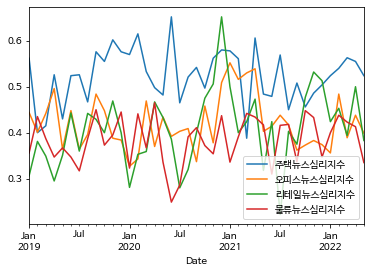

In [15]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
%matplotlib inline
import matplotlib.pyplot as plt
news_df.plot(x='Date')